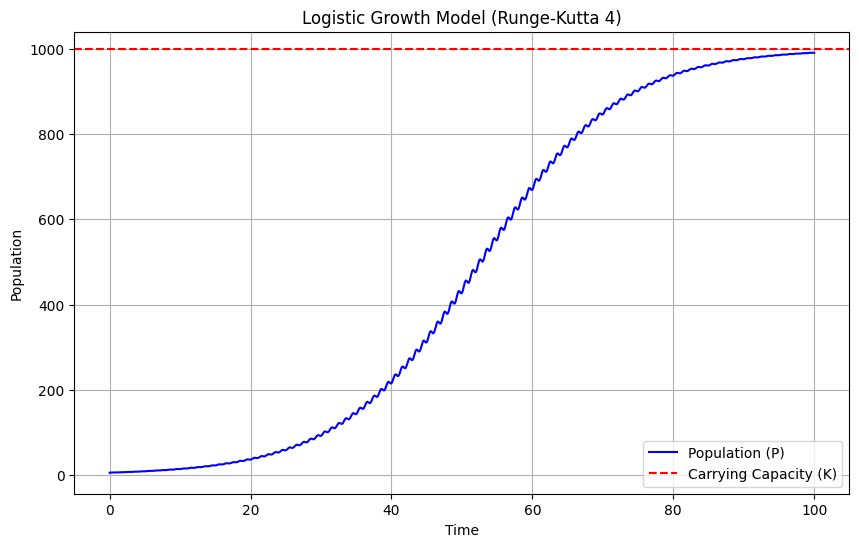

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function representing the derivative dP/dt
def dP_dt(P,r, K):
    return r * P * (1 - P / K)

def logistic_DE(r0, P0, K, T):
    
    dt = 0.01
    time_steps = int(T / dt)
    t = np.linspace(0, T, time_steps)

    r = r0*(.5+(np.sin(2*np.pi*t)))

    # Initialize population array
    P = np.zeros(time_steps)
    P[0] = P0

    # Runge-Kutta 4th Order Method
    for i in range(1, time_steps):
        k1 = dP_dt(P[i-1], r[i-1], K)
        k2 = dP_dt(P[i-1] + 0.5 * k1 * dt, r[i-1], K)
        k3 = dP_dt(P[i-1] + 0.5 * k2 * dt, r[i-1], K)
        k4 = dP_dt(P[i-1] + k3 * dt, r[i-1], K)
        P[i] = P[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) * dt / 6

    return t, P, K

t, P, K = logistic_DE(0.2, 5, 1000, 100)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, P, label="Population (P)", color="blue")
plt.axhline(y=K, color="red", linestyle="--", label="Carrying Capacity (K)")
plt.title("Logistic Growth Model (Runge-Kutta 4)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Disease probability based on population size
def disease_probability(P, threshold, min_prob = 0.25):
    
    prob = (P / threshold) ** 2
    return max(prob, min_prob)

def plotter(t,P,K,disease_years, disaster_years):
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label="Population (P)", color="blue")
    plt.axhline(y=K, color="red", linestyle="--", label="Carrying Capacity (K)")
    plt.vlines(x = disease_years,ymin =0, ymax = K, color='green', linestyle=':', linewidth=1, label = "Disease Outbreaks")
    plt.vlines(x = disaster_years,ymin =0, ymax = K, color='red', linestyle=':', linewidth=1, label = "Natural Disaster")
    plt.title("Logistic Growth Model (Runge-Kutta 4)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.show()

def logistic_DE_disease(r0, P0, K, T):
    
    dt = 0.01
    time_steps = int(T / dt)
    t = np.linspace(0, T, time_steps)

    r = r0*(1+(np.sin(2*np.pi*t)))

    # Initialize population array
    P = np.zeros(time_steps)
    P[0] = P0

    die_cycles = 1
    disease_timer = 0
    disease_active = False
    disease_years = []

    dis_cycles = 1
    disaster_years = []
    disaster_timer = 0
    factor_4 = np.random.uniform(55,175)

    # Runge-Kutta 4th Order Method
    for i in range(1, time_steps):
        k1 = dP_dt(P[i-1], r[i-1], K)
        k2 = dP_dt(P[i-1] + 0.5 * k1 * dt, r[i-1], K)
        k3 = dP_dt(P[i-1] + 0.5 * k2 * dt, r[i-1], K)
        k4 = dP_dt(P[i-1] + k3 * dt, r[i-1], K)
        P[i] = P[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) * dt / 6

        disease_timer += dt
        disaster_timer += dt

        if disease_timer >= 16:

            prob = disease_probability(P[i], 1.05*K) * die_cycles/8
            rand = np.random.rand()
            disease_timer = 0

            if rand < prob:

                disease_years.append(i*dt)

                r_saved = np.copy(r)

                factor_1 = np.random.uniform(.93, 1)

                factor_2 = np.random.uniform(-1, -1.1 - die_cycles/8)

                factor_3 = np.random.uniform(3, 4 + die_cycles/4)

                r = r * factor_2
                P[i] = P[i] * factor_1
                disease_active = True
                die_cycles = 1

            else:
                die_cycles += 1

        if disease_active == True and disease_timer > factor_3:
            r = np.copy(r_saved)
            disease_active = False
        
        if disaster_timer >= factor_4:
            disaster_timer = 0
            disaster_years.append(i*dt)
            factor_4 = np.random.uniform(200, 600*dis_cycles)
            factor_5 = np.random.uniform(.25, .92)
            P[i] = P[i]*factor_5
            
        
    return t, P, K, disease_years, disaster_years



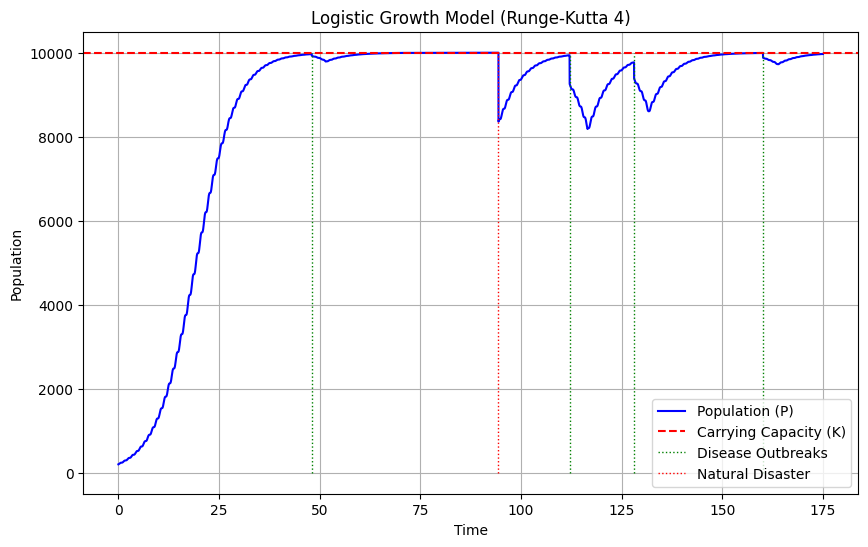

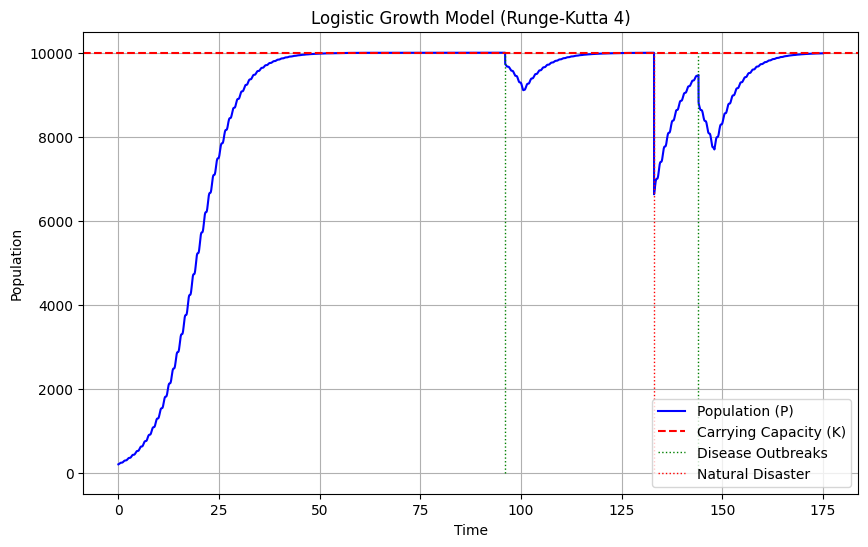

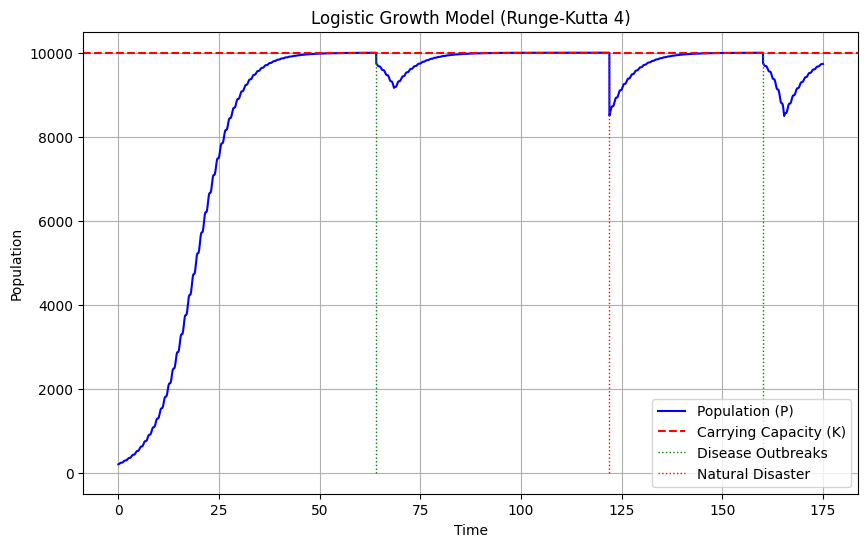

In [13]:
np.random.seed(6034544)
t, P, K, disease_years, disaster_years = logistic_DE_disease(0.2, 200, 10000, 175)
plotter(t, P, K, disease_years, disaster_years)

np.random.seed(8008)
t, P, K, disease_years, disaster_years = logistic_DE_disease(0.2, 200, 10000, 175)
plotter(t, P, K, disease_years, disaster_years)

np.random.seed(927354623)
t, P, K, disease_years, disaster_years = logistic_DE_disease(0.2, 200, 10000, 175)
plotter(t, P, K, disease_years, disaster_years)

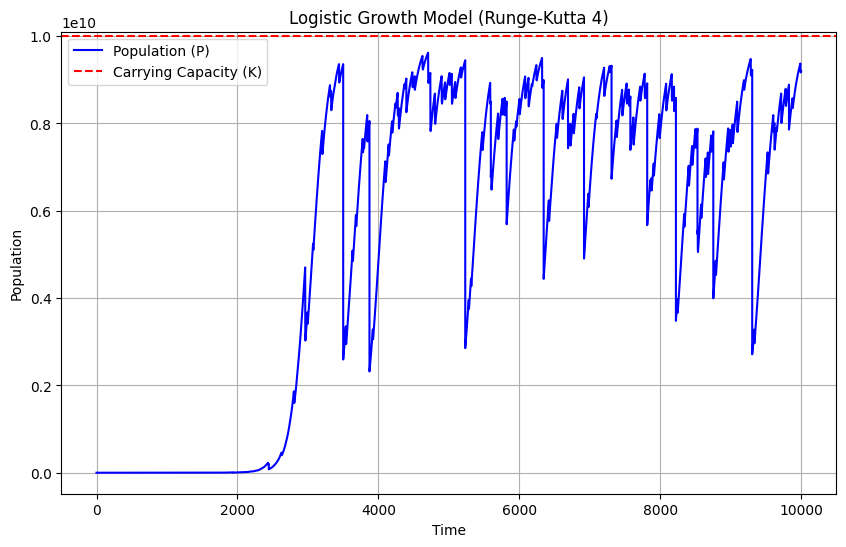

In [14]:
# Parameters
r0 = 0.01           # 1% growth rate
K = 10e9            # carrying capacity set to 10 billion
P0 = 2              # initial population
T = 10000          # total time (years)

#np.random.seed(33334)
t, P, K, disease_years, disaster_years = logistic_DE_disease(r0, P0, K, T)

plt.figure(figsize=(10, 6))
plt.plot(t, P, label="Population (P)", color="blue")
plt.axhline(y=K, color="red", linestyle="--", label="Carrying Capacity (K)")
#plt.vlines(x = disease_years,ymin =0, ymax = K, color='green', linestyle=':', linewidth=1, label = "Disease Outbreaks")
#plt.vlines(x = disaster_years,ymin =0, ymax = K, color='red', linestyle=':', linewidth=1, label = "Natural Disaster")
plt.title("Logistic Growth Model (Runge-Kutta 4)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()